In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange


Trying to get dispersion curves for TM modes

In [5]:
def TM_mode_eq(k, beta, N):
    width = 0.3
    n1 = 1.3
    n2 = np.sqrt(5.5+0.015j)
    n3 = n1
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)
    return np.real(width*q - np.arctan(n2**2*p/n1**2/q) - np.arctan(n2**2*r/n3**2/q) - np.pi*N)

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/505701154.py:6: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(beta**2 - (k*n1)**2)
/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/505701154.py:8: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(beta**2 - (k*n3)**2)


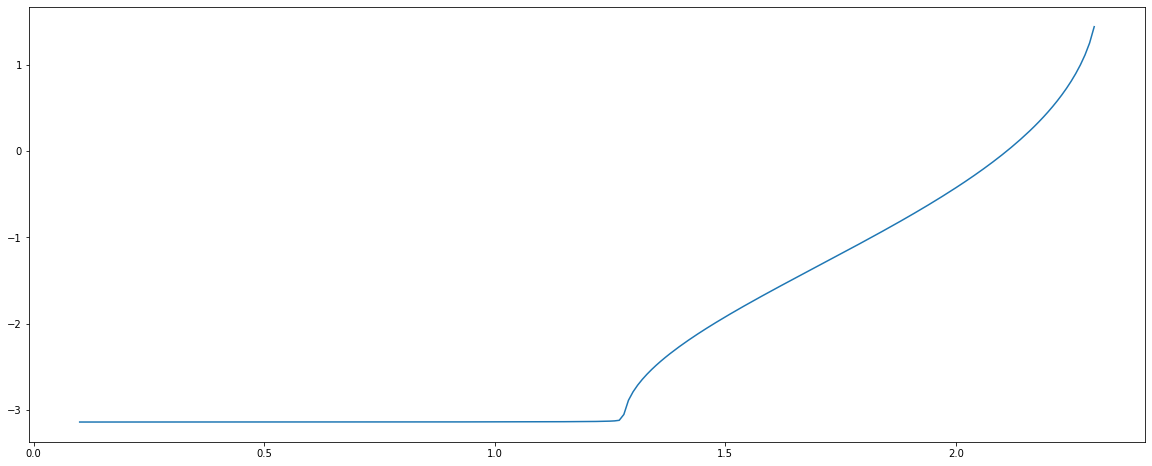

In [77]:
fig, ax = plt.subplots(figsize=(20, 8))
K = np.arange(0.1, 15, 0.01)

ax.plot(K, TM_mode_eq(K, 3, 0))

Text(0, 0.5, 'Normalaized propagation constant')

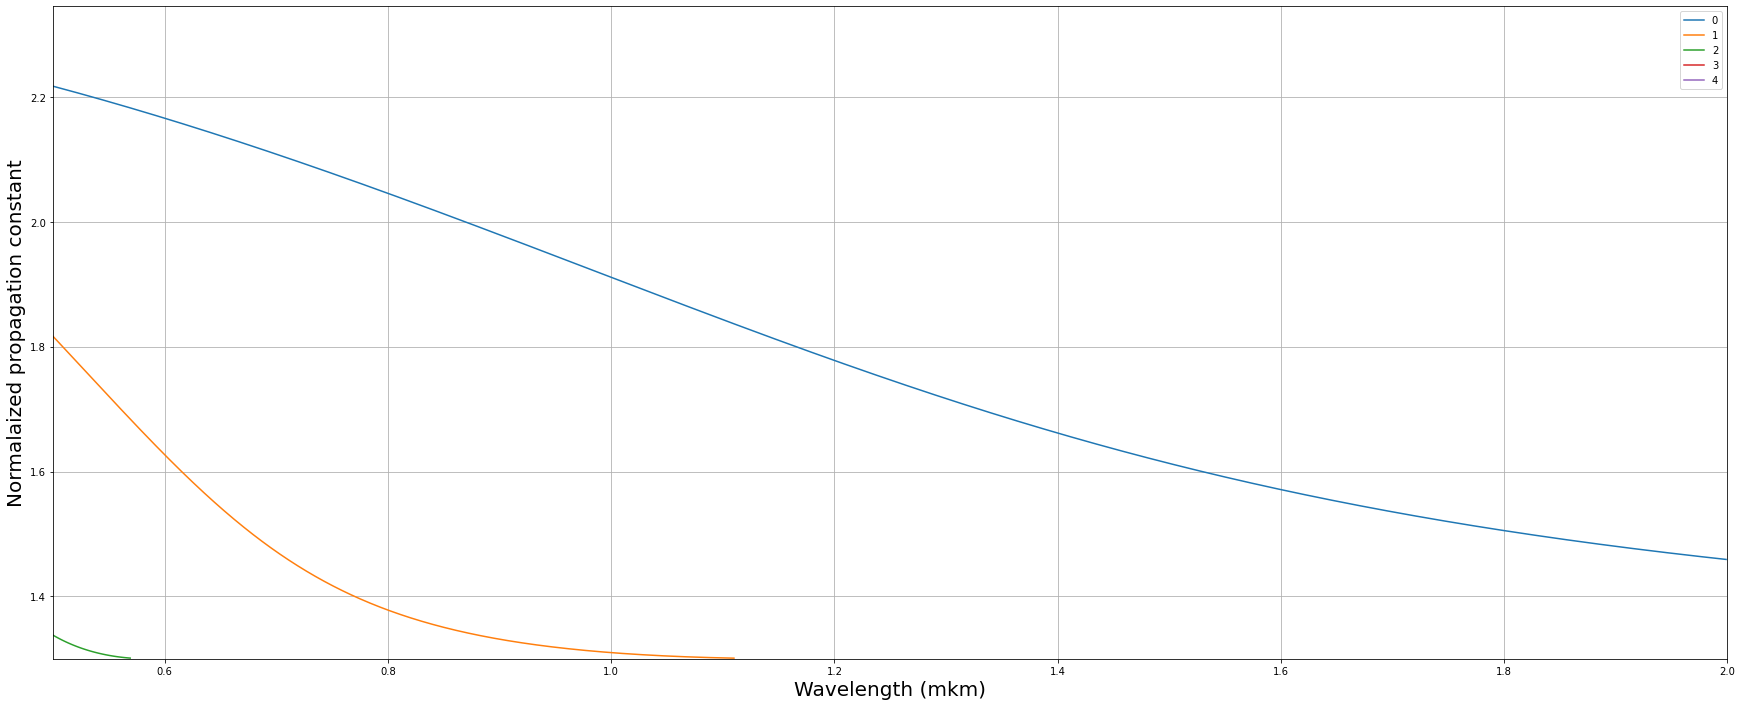

In [6]:
fig, ax = plt.subplots(figsize=(30, 12))

ax.grid(which='both')

Res = []

L = np.arange(0.5, 2, 0.001)
for n in range(5):
    res = []
    res_fsolve = []

    for l in L:
        k = 2*np.pi/l
        l_b = k*1.301
        r_b = k*2.344
        if TM_mode_eq(k, l_b, n)*TM_mode_eq(k, r_b, n) < 0:
            beta = opt.brentq(lambda x: TM_mode_eq(k, x, n), l_b, r_b)
            res.append((l, beta/k))

    res_k = [x[0] for x in res]
    res_b = [x[1] for x in res]

    Res.append({'mode': n, 'lambda': res_k, 'beta': res_b})

    ax.plot(res_k, res_b, label=n)

ax.legend()
ax.set_xlim(0.5, 2)
ax.set_ylim(1.3, 2.345)
ax.set_xlabel('Wavelength (mkm)', size='20')
ax.set_ylabel('Normalaized propagation constant', size='20')

Plot spatial distribution

In [8]:
def TM_H_y(b, l, x, z):
    k = 2*np.pi/l
    beta = b*k
    width = 0.4
    n1 = 1.3
    n2 = np.sqrt(5.5+0.015j)
    n3 = n1
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)

    return np.real((-n1**2*p/n2**2/q*np.cos(q*(z-width/2))+np.sin(q*(z-width/2)))*np.exp(-1j*beta*x))

In [14]:
for_plotting = []
for_plotting2 = []
for x in Res[:-2]:
    for_plotting.append((x['mode'], x['lambda'][0], x['beta'][0]))
    for i in range(len(x['beta'])):
        if x['beta'][i] < 1.603936 and x['beta'][i] > 1.603:
            for_plotting2.append((x['mode'], x['lambda'][i], x['beta'][i]))
            
for_plotting, for_plotting2

([(0, 0.5, 2.217175242405064),
  (1, 0.5, 1.8162843989153337),
  (2, 0.5, 1.3376787894796907)],
 [(0, 1.5210000000000008, 1.6036718701753148),
  (0, 1.522000000000001, 1.6032336036382777),
  (1, 0.6130000000000001, 1.6036008729231652)])

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_5359/2821775606.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


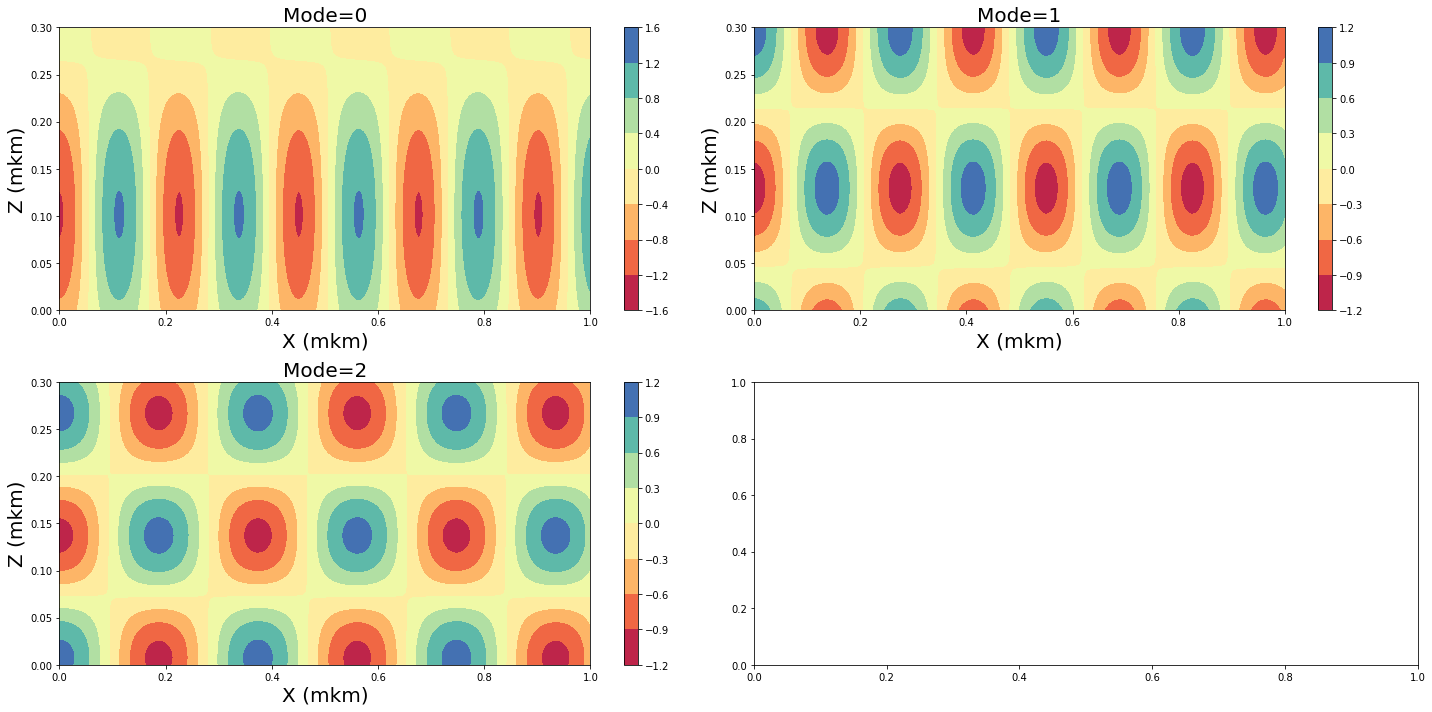

In [17]:
fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
axes = axes.reshape(-1)
cmap = plt.get_cmap(name='Spectral')

for i, item in enumerate(for_plotting):
    m, lam, beta = item
    X = np.arange(0, 1, 0.001)
    Z = np.arange(0, 0.3, 0.001)

    X, Z = np.meshgrid(X, Z)
    H_y = TM_H_y(beta, lam, X, Z)

    cf = axes[i].contourf(X, Z, H_y, cmap = cmap)
    fig.colorbar(cf, ax=axes[i])
    axes[i].set_title(f'Mode={m}', size=20)
    axes[i].set_xlabel('X (mkm)', size=20)
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel('Z (mkm)', size=20)
    axes[i].set_ylim(0, 0.3)

fig.tight_layout()
fig.show()


/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/1290560336.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


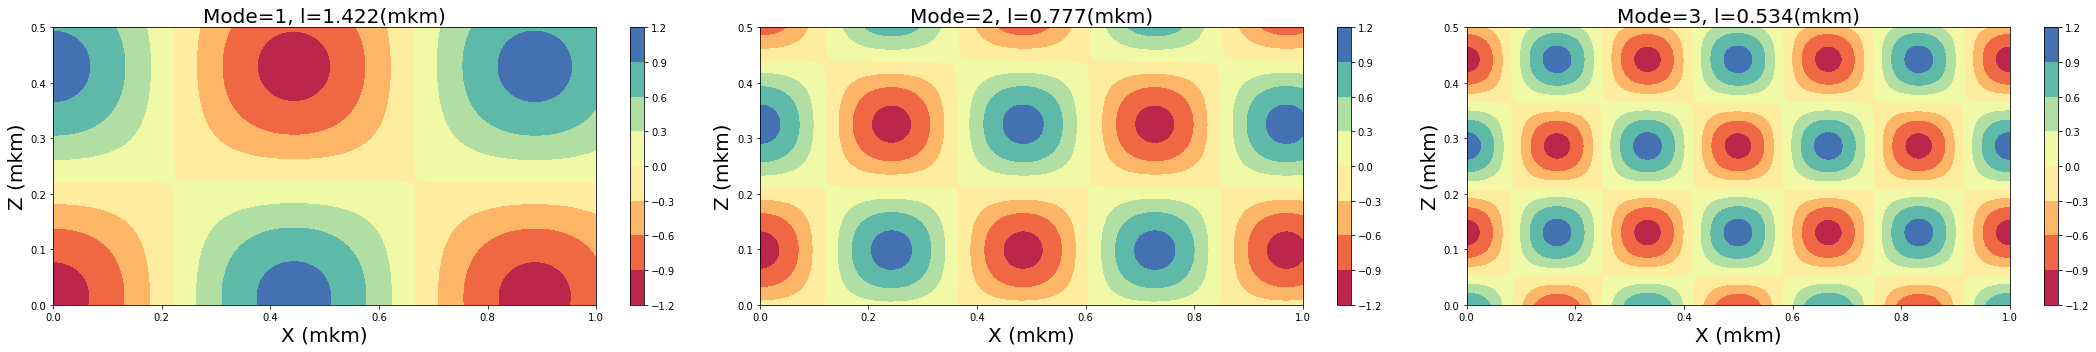

In [190]:
fig, axes = plt.subplots(figsize=(30, 5), ncols=3, nrows=1)
axes = axes.reshape(-1)
cmap = plt.get_cmap(name='Spectral')

for i, item in enumerate(for_plotting2):
    m, lam, beta = item
    X = np.arange(0, 1, 0.001)
    Z = np.arange(0, 0.5, 0.001)

    X, Z = np.meshgrid(X, Z)
    H_y = TM_H_y(beta, lam, X, Z)

    cf = axes[i].contourf(X, Z, H_y, cmap = cmap)
    fig.colorbar(cf, ax=axes[i])
    axes[i].set_title(f'Mode={m}, l={round(lam, 3)}(mkm)', size=20)
    axes[i].set_xlabel('X (mkm)', size=20)
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel('Z (mkm)', size=20)
    axes[i].set_ylim(0, 0.5)

fig.tight_layout()
fig.show()


# TE modes

In [159]:
def TE_mode_eq(k, beta, N):
    width = 0.3
    n1 = 1.5
    n2 = np.sqrt(5.5)
    n3 = n1

    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)
    tmp = np.arctan(q*(p+r)/(q*q - p*r))
    if (q*q - p*r) < 0:
        tmp += np.pi
        
    return np.real(width*q - np.pi*(N) - tmp)

In [151]:
TE_mode_eq(K, 3, 0)

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/280739937.py:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(beta**2 - (k*n1)**2)
/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/280739937.py:8: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt(-beta**2 + (k*n2)**2)
/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/280739937.py:9: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(beta**2 - (k*n3)**2)


array([nan, nan, nan, ..., nan, nan, nan])

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/340245665.py:8: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt(-beta**2 + (k*n2)**2)
/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/340245665.py:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(beta**2 - (k*n1)**2)
/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/340245665.py:9: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(beta**2 - (k*n3)**2)


(2.2, 3.0)

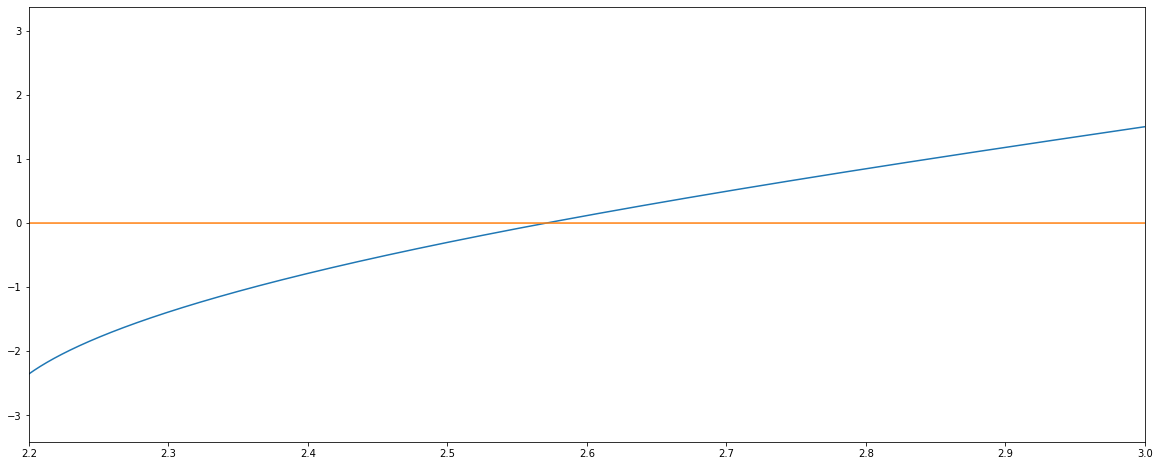

In [180]:
fig, ax = plt.subplots(figsize=(20, 8))
K = np.arange(1, 12, 0.0001)
Y = [TE_mode_eq(k, 5.1, 0) for k in K]


ax.plot(K, Y, K, K*0)
ax.set_xlim(2.2, 3)

Text(0, 0.5, 'Normalaized propagation constant')

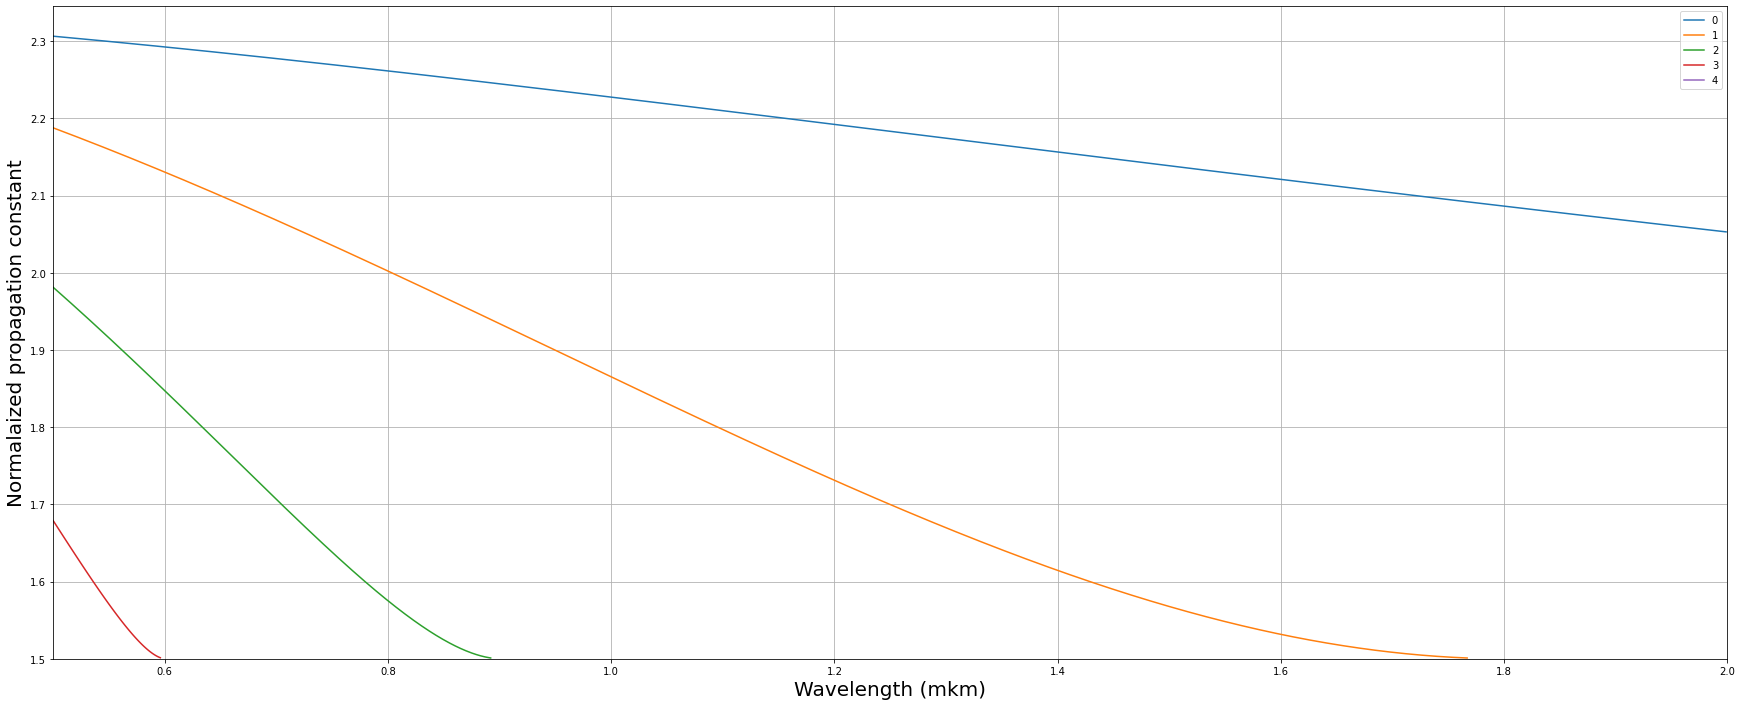

In [184]:
fig, ax = plt.subplots(figsize=(30, 12))

ax.grid(which='both')

Res = []

L = np.arange(0.5, 2, 0.001)
for n in range(5):
    res = []
    res_fsolve = []

    for l in L:
        k = 2*np.pi/l
        l_b = k*1.501
        r_b = k*2.344
        if TE_mode_eq(k, l_b, n)*TE_mode_eq(k, r_b, n) < 0:
            beta = opt.brentq(lambda x: TE_mode_eq(k, x, n), l_b, r_b)
            res.append((l, beta/k))


    res_k = [x[0] for x in res]
    res_b = [x[1] for x in res]

    Res.append({'mode': n, 'lambda': res_k, 'beta': res_b})

    ax.plot(res_k, res_b, label=n)

ax.legend()
ax.set_xlim(0.5, 2)
ax.set_ylim(1.5, 2.345)
ax.set_xlabel('Wavelength (mkm)', size='20')
ax.set_ylabel('Normalaized propagation constant', size='20')

In [191]:
for_plotting = []
for_plotting2 = []
for x in Res[:-1]:
    for_plotting.append((x['mode'], x['lambda'][0], x['beta'][0]))
    for i in range(len(x['beta'])):
        if x['beta'][i] < 1.603936 and x['beta'][i] > 1.603:
            for_plotting2.append((x['mode'], x['lambda'][i], x['beta'][i]))
            
for_plotting, for_plotting2

([(0, 0.5, 2.3064944947076556),
  (1, 0.5, 2.187778952223005),
  (2, 0.5, 1.9812081457682262),
  (3, 0.5, 1.6789598724820025)],
 [(1, 1.4220000000000008, 1.6034428710347395),
  (2, 0.7770000000000002, 1.6030319182060588),
  (3, 0.534, 1.6039346950655589)])

In [194]:
def TE_Ey(b, l, x, z):
    k = 2*np.pi/l
    beta = b*k
    width = 0.4
    n1 = 1.3
    n2 = np.sqrt(5.5+0.015j)
    n3 = n1
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)

    return np.real((np.cos(q*(z-width/2))+p/q*np.sin(q*(z-width/2)))*np.exp(-1j*beta*x))
    

/var/folders/r7/9wz772191y50mf0mt_6wz7680000gn/T/ipykernel_96044/4125635646.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


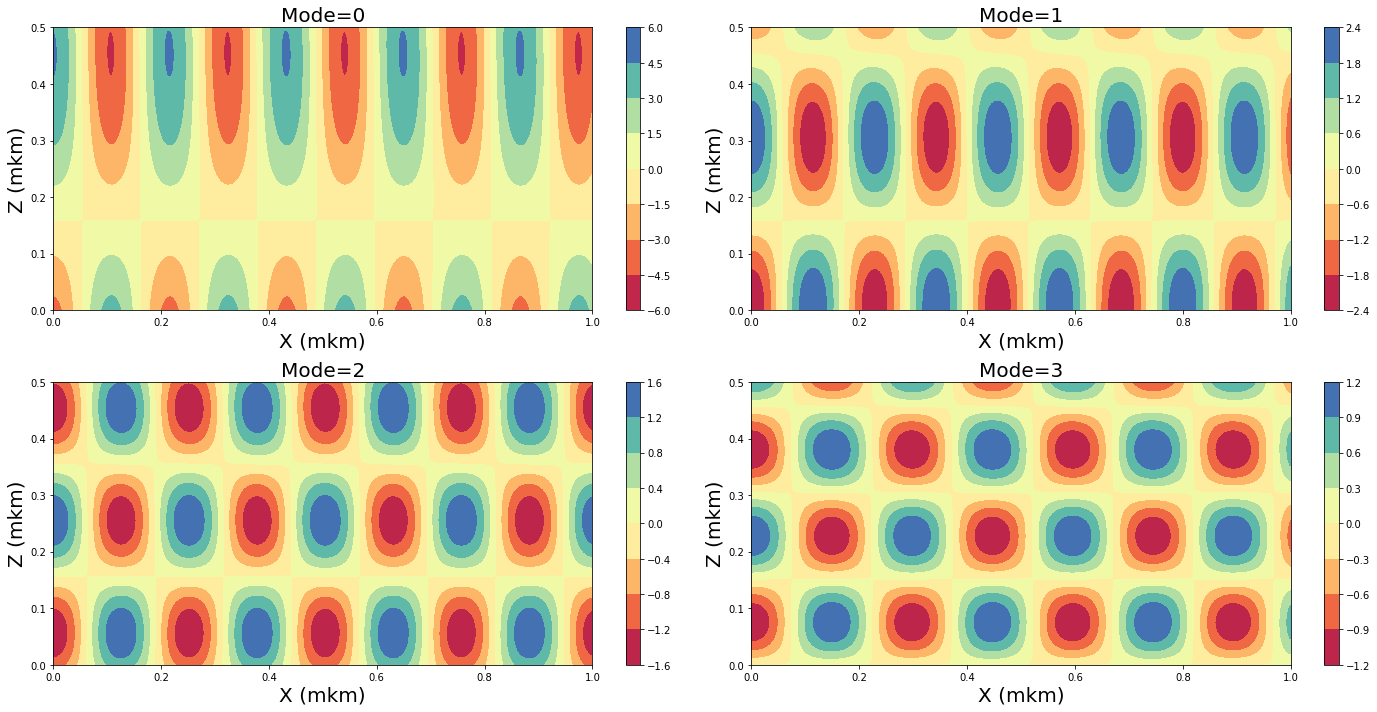

In [196]:
fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
axes = axes.reshape(-1)
cmap = plt.get_cmap(name='Spectral')

for i, item in enumerate(for_plotting):
    m, lam, beta = item
    X = np.arange(0, 1, 0.001)
    Z = np.arange(0, 0.5, 0.001)

    X, Z = np.meshgrid(X, Z)
    E_y = TE_Ey(beta, lam, X, Z)

    cf = axes[i].contourf(X, Z, E_y, cmap = cmap)
    fig.colorbar(cf, ax=axes[i])
    axes[i].set_title(f'Mode={m}', size=20)
    axes[i].set_xlabel('X (mkm)', size=20)
    axes[i].set_xlim(0, 1)
    axes[i].set_ylabel('Z (mkm)', size=20)
    axes[i].set_ylim(0, 0.5)

fig.tight_layout()
fig.show()